In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# read csv
df = pd.read_csv('ECG.csv')
X = df.drop(['target','Unnamed: 0'] , axis=1)
y = df.target

# Decision Tree

In [3]:
def train_decisionTree(x_train, y_train, x_test, y_test, first_class_index = 0):
    classifiers = []
    for i in range(0, 9):
        clf = DecisionTreeClassifier()
        y_train_binary = (y_train == i)
        clf.fit(x_train, y_train_binary)
        classifiers.append(clf)

    y_pred = []
    for i in range(len(x_test)):
        scores = []
        for clf in classifiers:
            score = clf.predict_proba([x_test[i]])[0][1]
            scores.append(score)
        y_pred.append(scores.index(max(scores)))

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    # return classifiers


In [ ]:
# 1. Prepare your data
# X, y = load_iris(return_X_y=True) # load the iris dataset

# 2. Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_decisionTree(X_train, y_train, X_test, y_test)

# 5. Make predictions on new examples
# new_example = [5.1, 3.5, 1.4, 0.2] # example input features
# scores = []
# for clf in models:
#     score = clf.predict_proba([new_example])[0][1]
#     scores.append(score)
# class_pred = scores.index(max(scores))
# print('Predicted class:', class_pred)

# Random Forest

In [28]:
def train_randomForest(x_train, y_train, x_test, y_test, n_ofTrees):
    clf = RandomForestClassifier(n_estimators=n_ofTrees, max_depth=7, random_state=42)

    # Train the model
    clf.fit(x_train, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(x_test)

    # Evaluate the performance of the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    return clf

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Generate random dataset for classification
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=3, random_state=42)
#read X, y from df
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = train_randomForest(X_train, y_train, X_test, y_test, 100)
# Create a random forest classifier
# clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# # Train the model
# clf.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = clf.predict(X_test)

# # Evaluate the performance of the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred, average='macro'))
# print("Recall:", recall_score(y_test, y_pred, average='macro'))
# print("F1-score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 1.0


In [ ]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

# X, y = load_digits(return_X_y=True)
# naive_bayes = GaussianNB()
# svc = SVC(kernel="rbf", gamma=0.001)
# The from_estimator displays the learning curve given the dataset and the predictive model to analyze. To get an estimate of the scores uncertainty, this method uses a cross-validation procedure.

# from sklearn.model_selection import *
# import matplotlib.pyplot as plt
# import numpy as np

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)

# common_params = {
#     "X": X,
#     "y": y,
#     "train_sizes": np.linspace(0.1, 1.0, 5),
#     "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
#     "score_type": "both",
#     "n_jobs": 4,
#     "line_kw": {"marker": "o"},
#     "std_display_style": "fill_between",
#     "score_name": "Accuracy",
# }

# for estimator in enumerate([clf]):
#     LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[estimator])
#     handles, label = ax[estimator].get_legend_handles_labels()
#     ax[estimator].legend(handles[:2], ["Training Score", "Test Score"])
#     ax[estimator].set_title(f"Learning Curve for {estimator.__class__.__name__}")


# Naive Bayes

In [ ]:
def train_naiveBayes(x_train, y_train):
    clf = MultinomialNB()
    clf.fit(x_train, y_train)
    return clf

In [ ]:
#feature selection
# select top n features

In [ ]:
# Load the data into a Pandas DataFrame
# train_data = ['this is the first document', 'this is the second document', 'and this is the third document']

# # Define the target classes
# target_classes = ['class1', 'class2', 'class3']

# #convert to data frame
# data = pd.DataFrame({'text': train_data, 'target': target_classes})


# Define the input features and target variable
# X = data['text']
# y = data['target']

# Create a CountVectorizer object to convert text into numerical features
# vectorizer = CountVectorizer()

# # Convert the input features into a matrix of numerical features
# X_matrix = vectorizer.fit_transform(X_train)

model = train_naiveBayes(X_train, y_train) 

# Create a Multinomial Naive Bayes classifier object
# clf = MultinomialNB()

# Train the classifier on the input features and target variable
# clf.fit(X_matrix, y)

# Use the classifier to predict the class of a new document
# new_doc = 'this is a new document'
# new_doc_matrix = vectorizer.transform(X_test)
# predicted_class = model.predict(X_test)
# print(predicted_class)

# Feature Slection

C:\Users\Anwar\AppData\Local\Temp\ipykernel_19664\485956005.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['target'] = df['target']


Accuracy: 0.9036144578313253


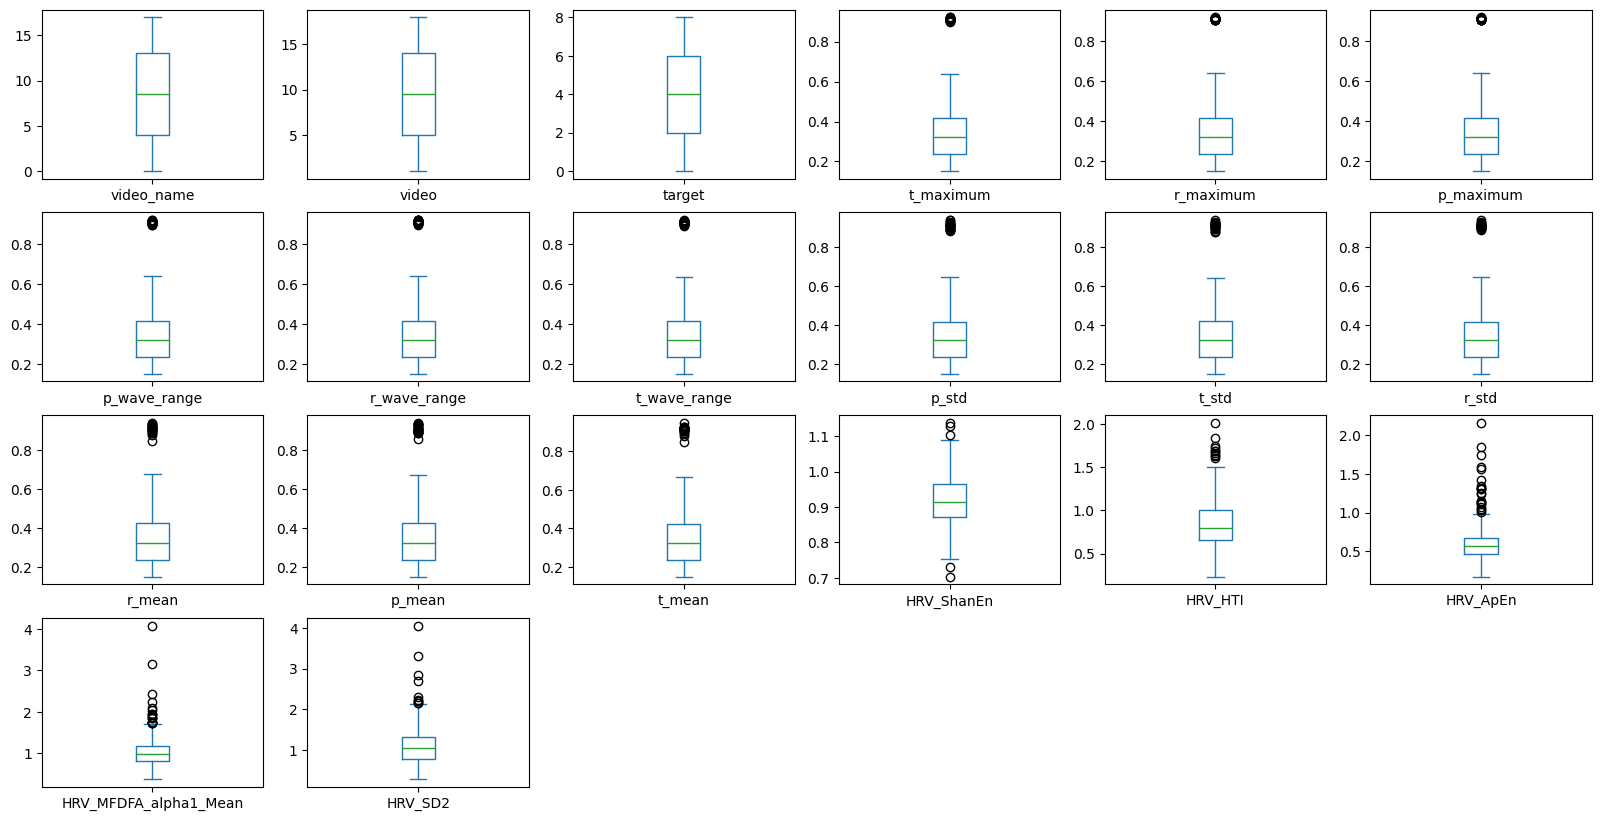

In [39]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
importance = mutual_info_classif(X,y)
feat_importance = pd.Series(importance , X.columns[0:len(df.columns)-2])
#sortthe features 
feat_importance = feat_importance.sort_values(ascending=False)

#loop on sorted features and print 
selected_features = []
for i in feat_importance.index:
    if feat_importance[i] > 0.08:
        # print(i,feat_importance[i])
        selected_features.append(i)

# selected_features

# create a data frame of the selected features
df_selected_features = df[selected_features]
df_selected_features['target'] = df['target']
df_selected_features.head()

X = df_selected_features
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = train_randomForest(X_train, y_train, X_test, y_test, 7)

X.plot(kind="box",subplots=True,layout=(7,6),figsize=(20,18))
plt.show()

# feat_importance.plot(kind='barh', color = 'black')

# plt.show()
# feat_importance

In [57]:
df_selected_features=df_selected_features[df_selected_features['HRV_ShanEn'] < 1.05]
df_selected_features=df_selected_features[df_selected_features['HRV_ShanEn'] > 0.75]

In [58]:
df_selected_features=df_selected_features[df_selected_features['HRV_HTI'] < 1.75]

In [59]:
df_selected_features=df_selected_features[df_selected_features['HRV_ApEn'] < 1.6]

In [60]:

df_selected_features=df_selected_features[df_selected_features['HRV_MFDFA_alpha1_Mean'] < 2.7]

In [61]:
df_selected_features=df_selected_features[df_selected_features['HRV_SD2'] < 2.5]

In [69]:
X = df_selected_features
y = df_selected_features.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = train_randomForest(X_train, y_train, X_test, y_test, 2)

Accuracy: 0.9743589743589743
